### Introduction to Machine Learning, UZH FS18, Group Project

### Group 2: Barbara Capl, Mathias Lüthi, Pamela Matias, Stefanie Rentsch


#     
# II.i     Feature Extraction with PCA

In [2]:
# hide unnecessary warnings ("depreciation" of packages etc.)
import warnings
warnings.filterwarnings('ignore')

# import packages
import numpy as np
import pandas as pd
import matplotlib as pl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn as skl
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# 1. Import datasets (pre-generated test-split)


#### Version 1: only ratios as predictive features

In [24]:
# Import Feature Matrix
X1_train = pd.read_csv('Data/generated_splits/X1_train.csv', sep = ',')
X1_test = pd.read_csv('Data/generated_splits/X1_test.csv', sep = ',')

# Import Response Vector
y1_train = pd.read_csv('Data/generated_splits/y1_train.csv', sep = ',')
y1_test = pd.read_csv('Data/generated_splits/y1_test.csv', sep = ',')


### OR COULD ALSO IMPORT DATASET 1 & 2 AND THEN MAKE TRAIN-TEST SPLIT AGAIN!!

#df_1 = pd.read_csv('Data/generated_datasets/df_1.csv', sep = ',')
#print('Shape of Dataset 1 = ' + str(df_1.shape))

# Extract labels of features
#labels_of_features_1 = imputed_dataset.columns[:-1]
#type(labels_of_features_1)

# X1 is the feature matrix
#X1 = imputed_dataset.iloc[:, :-1]
#print("")
#print('Head of Feature Matrix X1')
#display(X1.head())

# # y1 is the response vector
#y1 = imputed_dataset.iloc[:, -1]
#print("")
#print('Head of Response Vector y1')
#display(y1.head())

# Do the train - test- split
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0, stratify = y1)

# Check if there is the approximately same percentage of '1' i both training and test response vector
#display(y1_train.sum() / y1_train.size)
#display(y1_test.sum() / y1_test.size)

# Standardization with sklearn StandardScaler
#standard_scaler_1 = preprocessing.StandardScaler().fit(X1_train)
#X1_train = standard_scaler_1.transform(X1_train)
#X1_test = standard_scaler_1.transform(X1_test)

Shape of Imputed Dataset = (3519, 94)
Shape of Dataset with Nans dropped = (1430, 94)


#### Version 2: ratios + seasonality + other market data

In [24]:
# Import Feature Matrix
X2_train = pd.read_csv('Data/generated_splits/X2_train.csv', sep = ',')
X2_test = pd.read_csv('Data/generated_splits/X2_test.csv', sep = ',')

# Import Response Vector
y2_train = pd.read_csv('Data/generated_splits/y2_train.csv', sep = ',')
y2_test = pd.read_csv('Data/generated_splits/y2_test.csv', sep = ',')



### OR COULD ALSO IMPORT DATASET 1 & 2 AND THEN MAKE TRAIN-TEST SPLIT AGAIN!!

#df_2 = pd.read_csv('Data/generated_datasets/df_2.csv', sep = ',')
#print('Shape of Dataset 2 = ' + str(df_2.shape))

# Extract labels of features
#feature_labels_2 = df_2.columns[:-1]
#type(feature_labels_2)

# X2 is the feature matrix
#X2 = df_2.iloc[:, :-1]
#print("")
#print('Head of Feature Matrix X2')
#display(X2.head())

# # y2 is the response vector
#y2 = df_2.iloc[:, -1]
#print("")
#print('Head of Response Vector y2')
#display(y2.head())

# Do the train - test- split
#X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0, stratify = y2)

# Check if there is the approximately same percentage of '1' i both training and test response vector
#display(y2_train.sum() / y2_train.size)
#display(y2_test.sum() / y2_test.size)

# Standardization with sklearn StandardScaler
#standard_scaler_2 = preprocessing.StandardScaler().fit(X2_train)
#X2_train = standard_scaler_2.transform(X2_train)
#X2_test = standard_scaler_2.transform(X2_test)

Shape of Imputed Dataset = (3519, 94)
Shape of Dataset with Nans dropped = (1430, 94)


  
# 2. Generate PCA object and show plots

## 2.1.  Run PCA on whole Training Set for all possible PCAs (= number of columns)

In [33]:
# Run PCA for all possible PCAs
pca_a1 = PCA().fit(X1_train)
pca_a2 = PCA().fit(X2_train)

# Define maximal number of principal components => the "1" in shape[1] refers to columns ("0" would be rows)
q_a1 = X1_train.shape[1]
q_a2 = X2_train.shape[1]

# Get the amount of variance that each PC explains
# The eigenvalues represent the variance in the direction of the eigenvector
# These numbers for each component are proportional to the Eigenvalues 
# This means that the ratio of the eigenvalue of the first principal component 
# to the eigenvalue of the second principal component is 0.16214649
# SEE => https://stackoverflow.com/questions/37757172/finding-and-utilizing-eigenvalues-and-eigenvectors-from-pca-in-scikit-learn?rpca.q=1
expl_var_a1 = pca_a1.explained_variance_ratio_
expl_var_a2 = pca_a2.explained_variance_ratio_

# Get cumulative sum of the PCA 1-q_a1
sum_expl_var_a1 = np.cumsum(expl_var_a1)[:q_a1]
sum_expl_var_a2 = np.cumsum(expl_var_a2)[:q_a2]

# because we run PCA for all possible PCAs, sum of al explained Variance of the training set should be 1

print("")
print('---Dataset 1---')
print("")
print('Explained Variance, first 10 rows: ')
print(expl_var_a1[0:10])
print("")
print('Explained Variance in Total = ' + str(expl_var_a1.sum()))
print("")
print('Cumulative explained Variance, first 10 rows: ')
print(sum_expl_var_a1[0:10])
print("")
print('Maximal number (q_1) of PCs is: ' + str(q_a1))
print("")
print("")
print('---Dataset 2---')
print("")
print('Explained Variance, first 10 rows: ')
print(expl_var_a2[0:10])
print("")
print('Explained Variance in Total = ' + str(expl_var_a2.sum()))
print("")
print('Cumulative explained Variance, first 10 rows: ')
print(sum_expl_var_a2[0:10])
print("")
print('Maximal number (q_2) of PCs is: ' + str(q_a2))
print("")


---Version 1: Imputed Dataset---

Explained Variance, first 10 rows: 
[0.16214649 0.11216581 0.09743374 0.05947607 0.05223017 0.04726131
 0.03826923 0.03356937 0.03135616 0.02775493]

Explained Variance in Total = 1.0000000000000002

Cumulative explained Variance, first 10 rows: 
[0.16214649 0.2743123  0.37174604 0.43122212 0.48345229 0.5307136
 0.56898282 0.6025522  0.63390836 0.66166328]

Maximal number (q_1) of PCs is: 93


---Version 2: Dropnan Dataset---

Explained Variance, first 10 rows: 
[0.21706937 0.10834824 0.09389473 0.06581307 0.06190083 0.05694969
 0.05041091 0.04141501 0.03428958 0.02498159]

Explained Variance in Total = 1.0000000000000002

Cumulative explained Variance, first 10 rows: 
[0.21706937 0.32541762 0.41931235 0.48512542 0.54702625 0.60397595
 0.65438686 0.69580187 0.73009144 0.75507304]

Maximal number (q_2) of PCs is: 93



### 2.1.1  Plot cumulative explained variace

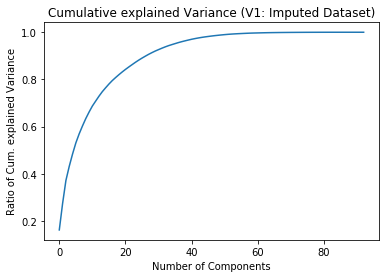

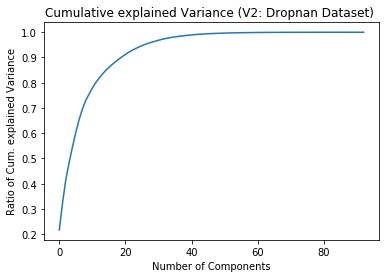

In [39]:
# Plot curve with cumulative sum (Dataset 1: only ratios)
plt.plot(sum_expl_var_a1)
plt.title('Cumulative explained Variance (D1)')
plt.xlabel('Number of Components')
plt.ylabel('Ratio of Cum. explained Variance')
plt.show();

# Plot curve with cumulative sum (Dataset 2: ratios + seasonality + market)
plt.plot(sum_expl_var_a2)
plt.title('Cumulative explained Variance (D2)')
plt.xlabel('Number of Components')
plt.ylabel('Ratio of Cum. explained Variance')
plt.show();

### 2.1.2  Plot explained variance by single components

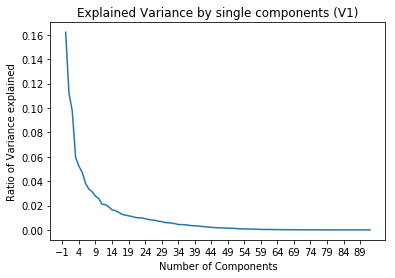

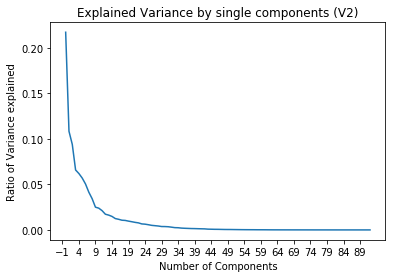

In [41]:
# Plot curve with explained variance (Dataset 1: only ratios)
plt.plot(expl_var_a1)
plt.title('Explained Variance by single components (D1)')
plt.xlabel('Number of Components')
plt.ylabel('Ratio of Variance explained')
plt.xticks(range(-1, q_a1 + 1, 5))
plt.show();

# Plot curve with explained variance (Dataset 2: ratios + seasonality + market)
plt.plot(expl_var_a2)
plt.title('Explained Variance by single components (D2)')
plt.xlabel('Number of Components')
plt.ylabel('Ratio of Variance explained')
plt.xticks(range(-1, q_a2 + 1, 5))
plt.show();

### 2.1.3 Plot feature importances

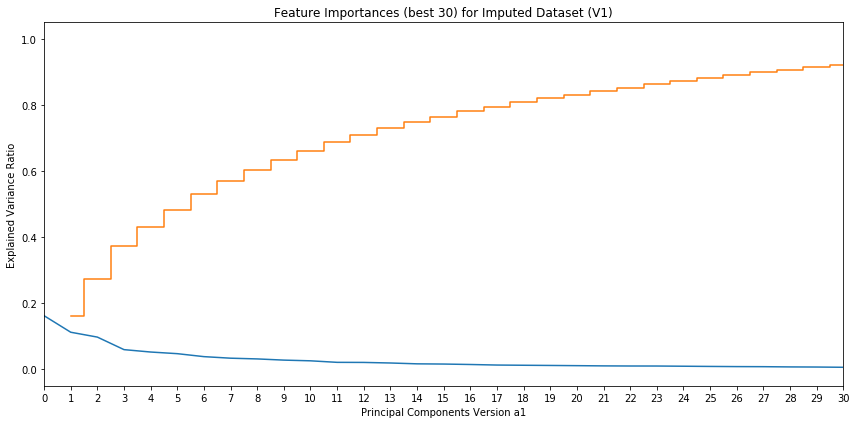

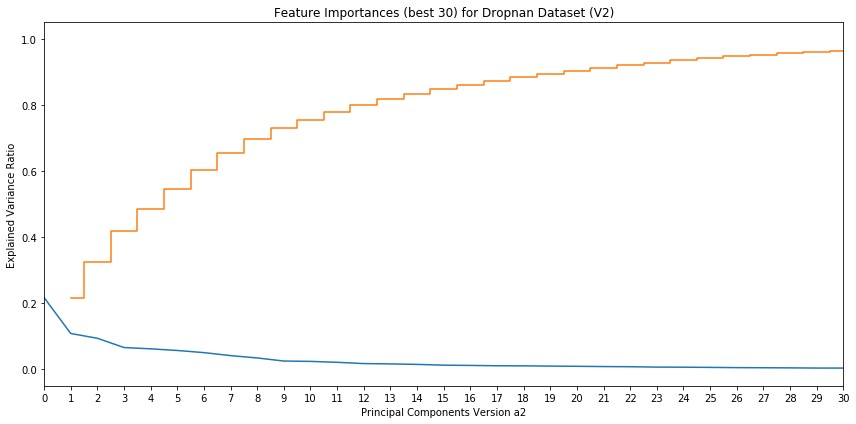

In [43]:
# Plot Feature Importances (both cumulative and idividual)
plt.figure(figsize = (12, 6))
plt.title('Feature Importances (best 30) for Dataset 1)')
plt.plot(expl_var_a1) #range(0, q_1 + 1), align = 'center')
plt.xticks(range(0, q_a1 + 1, 1))
plt.xlim([0, 30])
plt.xlabel('Principal Components Version a1')
plt.ylabel('Explained Variance Ratio')
plt.step(range(1, q_a1 + 1), sum_expl_var_a1, where = 'mid')
plt.tight_layout();

########  =>>> plt.bar(range(0, q_1), expl_var_1, alogn = 'center') gives ERROR MESSAGE.

# Plot Feature Importances (both cumulative and idividual)
plt.figure(figsize = (12, 6))
plt.title('Feature Importances (best 30) for Dataset 2')
plt.plot(expl_var_a2) #range(0, q_1 + 1), align = 'center')
plt.xticks(range(0, q_a2 + 1, 1))
plt.xlim([0, 30])
plt.xlabel('Principal Components Version a2')
plt.ylabel('Explained Variance Ratio')
plt.step(range(1, q_a2 + 1), sum_expl_var_a2, where = 'mid')
plt.tight_layout();

########  =>>> plt.bar(range(0, q_1), expl_var_1, alogn = 'center') gives ERROR MESSAGE.

## 2.2.  Run PCA on whole Training Set for selected number 'q' of PCAs

### 2.2.1. Choose number of Principal Components  and get them for further use

In [54]:
# Define number of principal components we wish to extract
q_1 = 10
q_2 = 10

# Create PCA object
pca_1 = PCA(n_components = q_1)
pca_2 = PCA(n_components = q_2)

# Fit PCA object to find first principal components
pca_1.fit(X1_train)
pca_2.fit(X2_train)

print('PCA Object 1; ' + str(pca_1))
print('PCA Object 2; ' + str(pca_2))

# Get the amount of variance that each PC explains
# The eigenvalues represent the variance in the direction of the eigenvector
# These numbers for each component are proportional to the Eigenvalues 
# This means that the ratio of the eigenvalue of the first principal component 
# to the eigenvalue of the second principal component is 0.16214649
# SEE => https://stackoverflow.com/questions/37757172/finding-and-utilizing-eigenvalues-and-eigenvectors-from-pca-in-scikit-learn?rpca.q=1
expl_var_1 = pca_1.explained_variance_ratio_
expl_var_2 = pca_2.explained_variance_ratio_

# Get cumulative sum of the PCA 1-q_1
sum_expl_var_1 = np.cumsum(expl_var_1)[:q_1]
sum_expl_var_2 = np.cumsum(expl_var_2)[:q_2]

# because we run PCA for only q_1 components, sum of al explained Variance of the training set should be LESS than 1

print("")
print('---Version 1: Imputed Dataset---')
print("")
print('Explained Variance, first 10 rows: ')
print(expl_var_1[0:10])
print("")
print('Explained Variance in Total = ' + str(expl_var_1.sum()))
print("")
print('Cumulative explained Variance, first 10 rows: ')
print(sum_expl_var_1[0:10])
print("")
print("")
print('---Version 2: Dropnan Dataset---')
print("")
print('Explained Variance, first 10 rows: ')
print(expl_var_2[0:10])
print("")
print('Explained Variance in Total = ' + str(expl_var_2.sum()))
print("")
print('Cumulative explained Variance, first 10 rows: ')
print(sum_expl_var_2[0:10])
print("")

PCA Object 1; PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
PCA Object 2; PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

---Version 1: Imputed Dataset---

Explained Variance, first 10 rows: 
[0.16214649 0.11216581 0.09743374 0.05947605 0.05223016 0.04726127
 0.03826841 0.0335688  0.03135543 0.02775264]

Explained Variance in Total = 0.6616588145696687

Cumulative explained Variance, first 10 rows: 
[0.16214649 0.2743123  0.37174604 0.43122209 0.48345226 0.53071353
 0.56898193 0.60255074 0.63390617 0.66165881]


---Version 2: Dropnan Dataset---

Explained Variance, first 10 rows: 
[0.21706937 0.10834824 0.09389473 0.06581307 0.06190083 0.05694969
 0.0504109  0.04141493 0.03428939 0.02497971]

Explained Variance in Total = 0.7550708720706368

Cumulative explained Variance, first 10 rows: 
[0.21706937 0.32541762 0.41931235 0.48512542 0.54702625 0.

### 2.2.2.  Extract q_1 /q_2 number of features out of Training Set; Transform feature matrix with pca object

#### Version 1: only ratios as predictive features

In [55]:
# Extract q_1 number of features according to pca analysis
# WEBSITE => https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/
X1_train_transformed = pca_1.fit_transform(X1_train)

# display properties
display(X1_train_transformed)
len(X1_train_transformed)
display(X1_train_transformed.shape)
display(X1_train.shape)

# This gives the Eigenvalues?

array([[ 4.31590536e+00,  1.70666807e+00, -4.34128348e-01, ...,
        -5.46551000e-01,  1.62320138e+00, -1.45144532e+00],
       [ 5.24864336e+00,  2.40429344e+00,  1.64333305e+00, ...,
        -4.12253037e-02,  1.91134736e+00, -5.85106179e-01],
       [-2.45572974e+00,  5.91318278e+00, -2.26706862e-01, ...,
        -4.03657729e-01, -1.08977821e-01,  1.31563490e+00],
       ...,
       [ 2.87438689e+00, -2.12139305e+00, -2.21526174e+00, ...,
        -9.63125829e-01,  1.60301654e+00, -1.82506651e-02],
       [-2.12668723e+00,  2.52638963e+00, -1.47263273e+00, ...,
         3.10488464e-01,  4.47773993e-01, -7.27731174e-01],
       [ 4.34957797e+00,  5.68558602e-03,  2.45500351e+00, ...,
         6.15230887e-01, -6.52788813e-01,  1.25758177e+00]])

(2815, 10)

(2815, 93)

#### Version 2: ratios + seasonality + other market data

In [57]:
# Extract q_2 number of features according to pca analysis
# WEBSITE => https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/
X2_train_transformed = pca_2.fit_transform(X2_train)

# display properties
display(X2_train_transformed)
len(X2_train_transformed)
display(X2_train_transformed.shape)
display(X2_train.shape)

# This gives the Eigenvalues?

array([[-10.25450983,  -2.95853666,   2.2152428 , ...,   1.2187406 ,
         -0.31968455,  -0.14865221],
       [ -0.93634349,  -5.79330528,  -2.31956235, ...,   1.25786756,
         -1.41136721,  -0.40973971],
       [  7.60996874,  -0.54319001,  -0.17052027, ...,   3.69958278,
          0.71582474,  -1.28384186],
       ...,
       [ -2.27782101,  -1.43692964,   3.79241378, ...,  -2.57120706,
         -2.97167423,   0.45817809],
       [  4.0655194 ,   2.68346915,  -0.36243831, ...,   0.53148039,
          1.77328373,  -0.67668986],
       [ -6.63701796,  -0.63235596,   3.54439465, ...,   1.75226398,
          0.08689571,  -0.0253776 ]])

(1144, 10)

(1144, 93)

### 2.2.3. Transform new data (Test set) using the already fitted pca_1 /pca_2     
### (((NOT SURE IF ITS CORRECT))) 

##### PCA components (Dont know how to use this)

In [58]:
# Print PCA components: every row is a principal component in the p-dimensional space
# Principal axes in feature space, representing the directions of maximum variance in the data. 
# The components are sorted by explained_variance_ 
# SEE SKLEARN DOCUMENTATION

#print(pca_1.components_)
#print(pca_2.components_)

In [59]:
# Goal: Test Set has the same features as training set

# For Dataset 1
X1_train_transformed = pca_1.fit_transform(X1_train)
X1_test_transformed = pca_1.transform(X1_test)

# For Dataset 2
X2_train_transformed = pca_2.fit_transform(X2_train)
X2_test_transformed = pca_2.transform(X2_test)



### 2.2.4. Save the Test- Train sets with selected features 

In [ ]:
# For Dataset 1
X1_train_transformed.to_csv('Data/generated_splits/X1_train_pca.csv')
X1_test_transformed.to_csv('Data/generated_splits/X1_test_pca.csv')

# For Dataset 2
X2_train_transformed.to_csv('Data/generated_splits/X2_train_pca.csv')
X2_test_transformed.to_csv('Data/generated_splits/X2_test_pca.csv')